In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest

from wordcloud import WordCloud
pd.set_option('display.max_columns', None)

In [66]:
df = pd.read_csv(r'C:\Playground\Catastrophe Risk Estimation Using Quantile Modeling\data\raw\PublicAssistanceGrantAwardActivities.csv')
df = df.sample(50_000)

In [67]:
# Preview the data
df.head(5)

,region,disasterNumber,sriaDisaster,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,pnpStatus,damageCategoryCode,federalShareObligated,dateObligated,pwNumber,projectTitle,versionNumber,eligibilityStatus,fundingStatus,paCloseoutStatus,id
796593,6,1791,0,HURRICANE IKE,DR,Hurricane,2008-09-13T00:00:00.000Z,TX,Texas,Harris,201-35000-00,HOUSTON,0.0,E - Public Buildings,669.57,2009-07-08T00:00:00.000Z,10077,PWE79 Imperial Valley WWTP,1.0,E,O,O,e077dfc0-4dd1-42db-bfbc-437714fc0d8d
494135,7,1705,0,"SEVERE STORMS, FLOODING, AND TORNADOES",DR,Severe Storm,2007-05-25T00:00:00.000Z,IA,Iowa,Montgomery,137-UDTEO-00,MONTGOMERY COUNTY ROAD DEPARTMENT,0.0,A - Debris Removal,2317.50,2007-07-27T00:00:00.000Z,612,DEBRIS REMOVAL,0.0,E,O,C,ca6533d0-35ab-46a0-979b-bcbfeb7e3d0d
803743,6,4152,1,"SEVERE STORMS, FLOODING, AND MUDSLIDES",DR,Flood,2013-10-29T00:00:00.000Z,NM,New Mexico,Statewide,000-35180-00,JEMEZ PUEBLO (INDIAN RESERVATION),0.0,A - Debris Removal,6341.24,2014-07-23T00:00:00.000Z,546,POJ005A Owl Bridge Sediment Removal,0.0,E,O,O,2e1cf3e8-a901-4c66-9b0a-5c3e4e4523ae
190217,10,1733,0,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",DR,Severe Storm,2007-12-08T00:00:00.000Z,OR,Oregon,Polk,053-99053-00,POLK (COUNTY),0.0,C - Roads and Bridges,4682.84,2008-04-15T00:00:00.000Z,544,REPAIR ROADWAY EMBANKMENT - FALLS CITY RD,0.0,E,O,C,8a2134ea-0bad-4e35-adc7-b8ba4a077340
32476,5,1805,0,SEVERE WIND STORM ASSOCIATED WITH TROPICAL DEP...,DR,Severe Storm,2008-10-24T00:00:00.000Z,OH,Ohio,Licking,089-33894-00,HARRISON (TOWNSHIP OF),0.0,B - Protective Measures,1024.70,2009-02-20T00:00:00.000Z,1177,BSJ-07 Township Roads,0.0,E,O,C,2f3c23d6-7ecf-41a8-a01f-f0a887010e95


In [68]:
# Summary of dataset
df.describe()

,region,disasterNumber,sriaDisaster,pnpStatus,federalShareObligated,pwNumber,versionNumber
count,50000.000000,50000.000000,50000.00000,49169.000000,4.999800e+04,50000.000000,49169.000000
mean,4.873920,2104.737180,0.06586,0.072302,6.744532e+04,2426.832960,0.524741
std,2.198836,965.885307,0.24804,0.258989,1.776133e+06,3673.054863,1.125830
min,1.000000,1239.000000,0.00000,0.000000,-1.129045e+08,1.000000,0.000000
25%,3.000000,1561.000000,0.00000,0.000000,9.374700e+02,257.000000,0.000000
50%,5.000000,1694.000000,0.00000,0.000000,4.545040e+03,852.000000,0.000000
75%,6.000000,1948.000000,0.00000,0.000000,1.933094e+04,2909.000000,1.000000
max,10.000000,5502.000000,1.00000,1.000000,1.858000e+08,21118.000000,24.000000


In [69]:
df.describe(include='O')

,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,damageCategoryCode,dateObligated,projectTitle,eligibilityStatus,fundingStatus,paCloseoutStatus,id
count,50000,50000,50000,50000,50000,50000,49167,50000,50000,50000,50000,49616,50000,50000,50000,50000
unique,603,3,24,1138,57,58,1850,16154,17482,16,6013,30714,4,2,2,50000
top,SEVERE STORMS AND FLOODING,DR,Severe Storm,2005-08-29T00:00:00.000Z,FL,Florida,Statewide,000-UXL4N-00,"FACILITY PLANNING AND CONTROL, STATE OF LOUISIANA",C - Roads and Bridges,2007-06-17T00:00:00.000Z,ROADS AND BRIDGES,E,O,C,e077dfc0-4dd1-42db-bfbc-437714fc0d8d
freq,6205,48034,20295,5054,5328,5328,9298,563,489,14229,381,3332,49896,49899,38102,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 796593 to 744108
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 50000 non-null  int64  
 1   disasterNumber         50000 non-null  int64  
 2   sriaDisaster           50000 non-null  int64  
 3   declarationTitle       50000 non-null  object 
 4   disasterType           50000 non-null  object 
 5   incidentType           50000 non-null  object 
 6   declarationDate        50000 non-null  object 
 7   stateAbbreviation      50000 non-null  object 
 8   state                  50000 non-null  object 
 9   county                 49167 non-null  object 
 10  applicantId            50000 non-null  object 
 11  applicantName          50000 non-null  object 
 12  pnpStatus              49169 non-null  float64
 13  damageCategoryCode     50000 non-null  object 
 14  federalShareObligated  49998 non-null  float64
 15  d

In [71]:
# Checking for duplicated instances
df.duplicated(keep=False).sum()

np.int64(0)

In [72]:
# Checking for null values
null_df = (
    df.isna()
      .sum()
      .to_frame(name="null_values")
      .reset_index()
      .rename(columns={"index": "feature_name"})
      .sort_values(by="null_values", ascending=False)
)

null_df

,feature_name,null_values
9,county,833
12,pnpStatus,831
18,versionNumber,831
17,projectTitle,384
14,federalShareObligated,2
1,disasterNumber,0
0,region,0
6,declarationDate,0
5,incidentType,0
4,disasterType,0


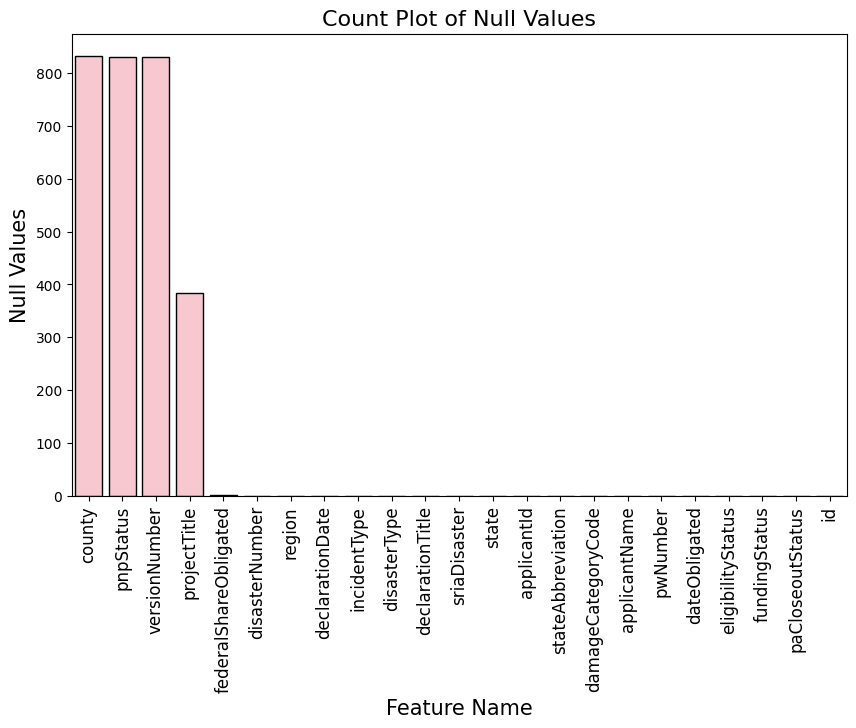

In [73]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=null_df,
    x='feature_name',
    y='null_values',
    edgecolor='black',
    color='pink'
)
ax.set_ylabel("Null Values", fontsize=15)
ax.set_xlabel("Feature Name", fontsize=15)
ax.set_title("Count Plot of Null Values", fontsize=16)
ax.tick_params(axis='x', labelrotation=90, labelsize=12)

plt.show()


In [74]:
df_clean = df.assign(
    dateObligated = pd.to_datetime(df.dateObligated.str.split("T").str[0]),
    declarationDate = pd.to_datetime(df.declarationDate.str.split("T").str[0])
)

In [75]:
num_cols = df_clean.select_dtypes(include=[int, float]).columns.to_list()
cat_cols = df_clean.select_dtypes(include='O').columns.to_list()

print(f"There are {len(num_cols)} Numerical columns: {num_cols}")
print(f"There are {len(cat_cols)} Categorical columns: {cat_cols}")

There are 7 Numerical columns: ['region', 'disasterNumber', 'sriaDisaster', 'pnpStatus', 'federalShareObligated', 'pwNumber', 'versionNumber']
There are 14 Categorical columns: ['declarationTitle', 'disasterType', 'incidentType', 'stateAbbreviation', 'state', 'county', 'applicantId', 'applicantName', 'damageCategoryCode', 'projectTitle', 'eligibilityStatus', 'fundingStatus', 'paCloseoutStatus', 'id']


# Univariate Analysis

**A. Numerical columns**

**region**: Identifies the FEMA administrative region responsible for overseeing the disaster response and recovery activities. FEMA divides the country into regions to manage operations more efficiently, and this field indicates which regional office handled coordination, approvals, and monitoring of projects and funding for a given disaster. It is useful for regional-level analysis, workload comparison, and understanding geographic variations in disaster management practices.

**disasterNumber**: A unique numeric identifier assigned by FEMA to each officially declared disaster. This number acts as the primary key linking all related records, including applications, project worksheets, funding obligations, and revisions. It enables tracking a disaster across time and datasets and is essential for aggregating impacts, costs, and recovery outcomes at the disaster-event level.

**sriaDisaster**: Indicates whether the disaster is covered under the Special Risk Insurance Act (SRIA). This flag affects insurance-related considerations and eligibility for certain types of federal assistance, especially in cases involving insurable properties. It helps distinguish disasters with additional regulatory or insurance constraints from standard disaster declarations.

**pnpStatus**: Specifies whether the applicant is a Public entity or a Private Non-Profit (PNP) organization. This classification directly influences eligibility criteria, documentation requirements, and cost-sharing rules under FEMA’s Public Assistance program. It is important for analyzing differences in funding patterns, approval timelines, and recovery outcomes between public agencies and non-profit organizations.

**federalShareObligated**: Represents the actual amount of federal funding that has been formally obligated for a specific project or work item. This is a key financial variable, reflecting confirmed government spending rather than estimated costs. It is critical for expenditure analysis, budget monitoring, and assessing the financial impact of disasters across regions, disaster types, or applicant categories.

**pwNumber**: Stands for Project Worksheet Number and uniquely identifies individual damage, repair, or recovery projects within a disaster. Each project worksheet documents the scope of work, estimated costs, approvals, and funding decisions. This column allows granular analysis at the project level, such as cost distribution, project complexity, and approval frequency within a single disaster.

**versionNumber**: Indicates the revision number of a project worksheet, capturing how many times the project details, scope, or cost estimates have been updated after initial submission. Higher version numbers often reflect project changes, reassessments, or corrections over time, making this field valuable for audit trails, change tracking, and understanding how recovery projects evolve during the disaster response lifecycle.

In [76]:
df_clean[num_cols]

,region,disasterNumber,sriaDisaster,pnpStatus,federalShareObligated,pwNumber,versionNumber
796593,6,1791,0,0.0,669.57,10077,1.0
494135,7,1705,0,0.0,2317.50,612,0.0
803743,6,4152,1,0.0,6341.24,546,0.0
190217,10,1733,0,0.0,4682.84,544,0.0
32476,5,1805,0,0.0,1024.70,1177,0.0
...,...,...,...,...,...,...,...
557291,4,1345,0,0.0,85053.22,2702,0.0
605961,2,4017,0,0.0,1768.64,2180,0.0
656734,2,1552,0,0.0,6900.86,518,0.0
149606,6,1751,0,0.0,27940.04,1200,0.0


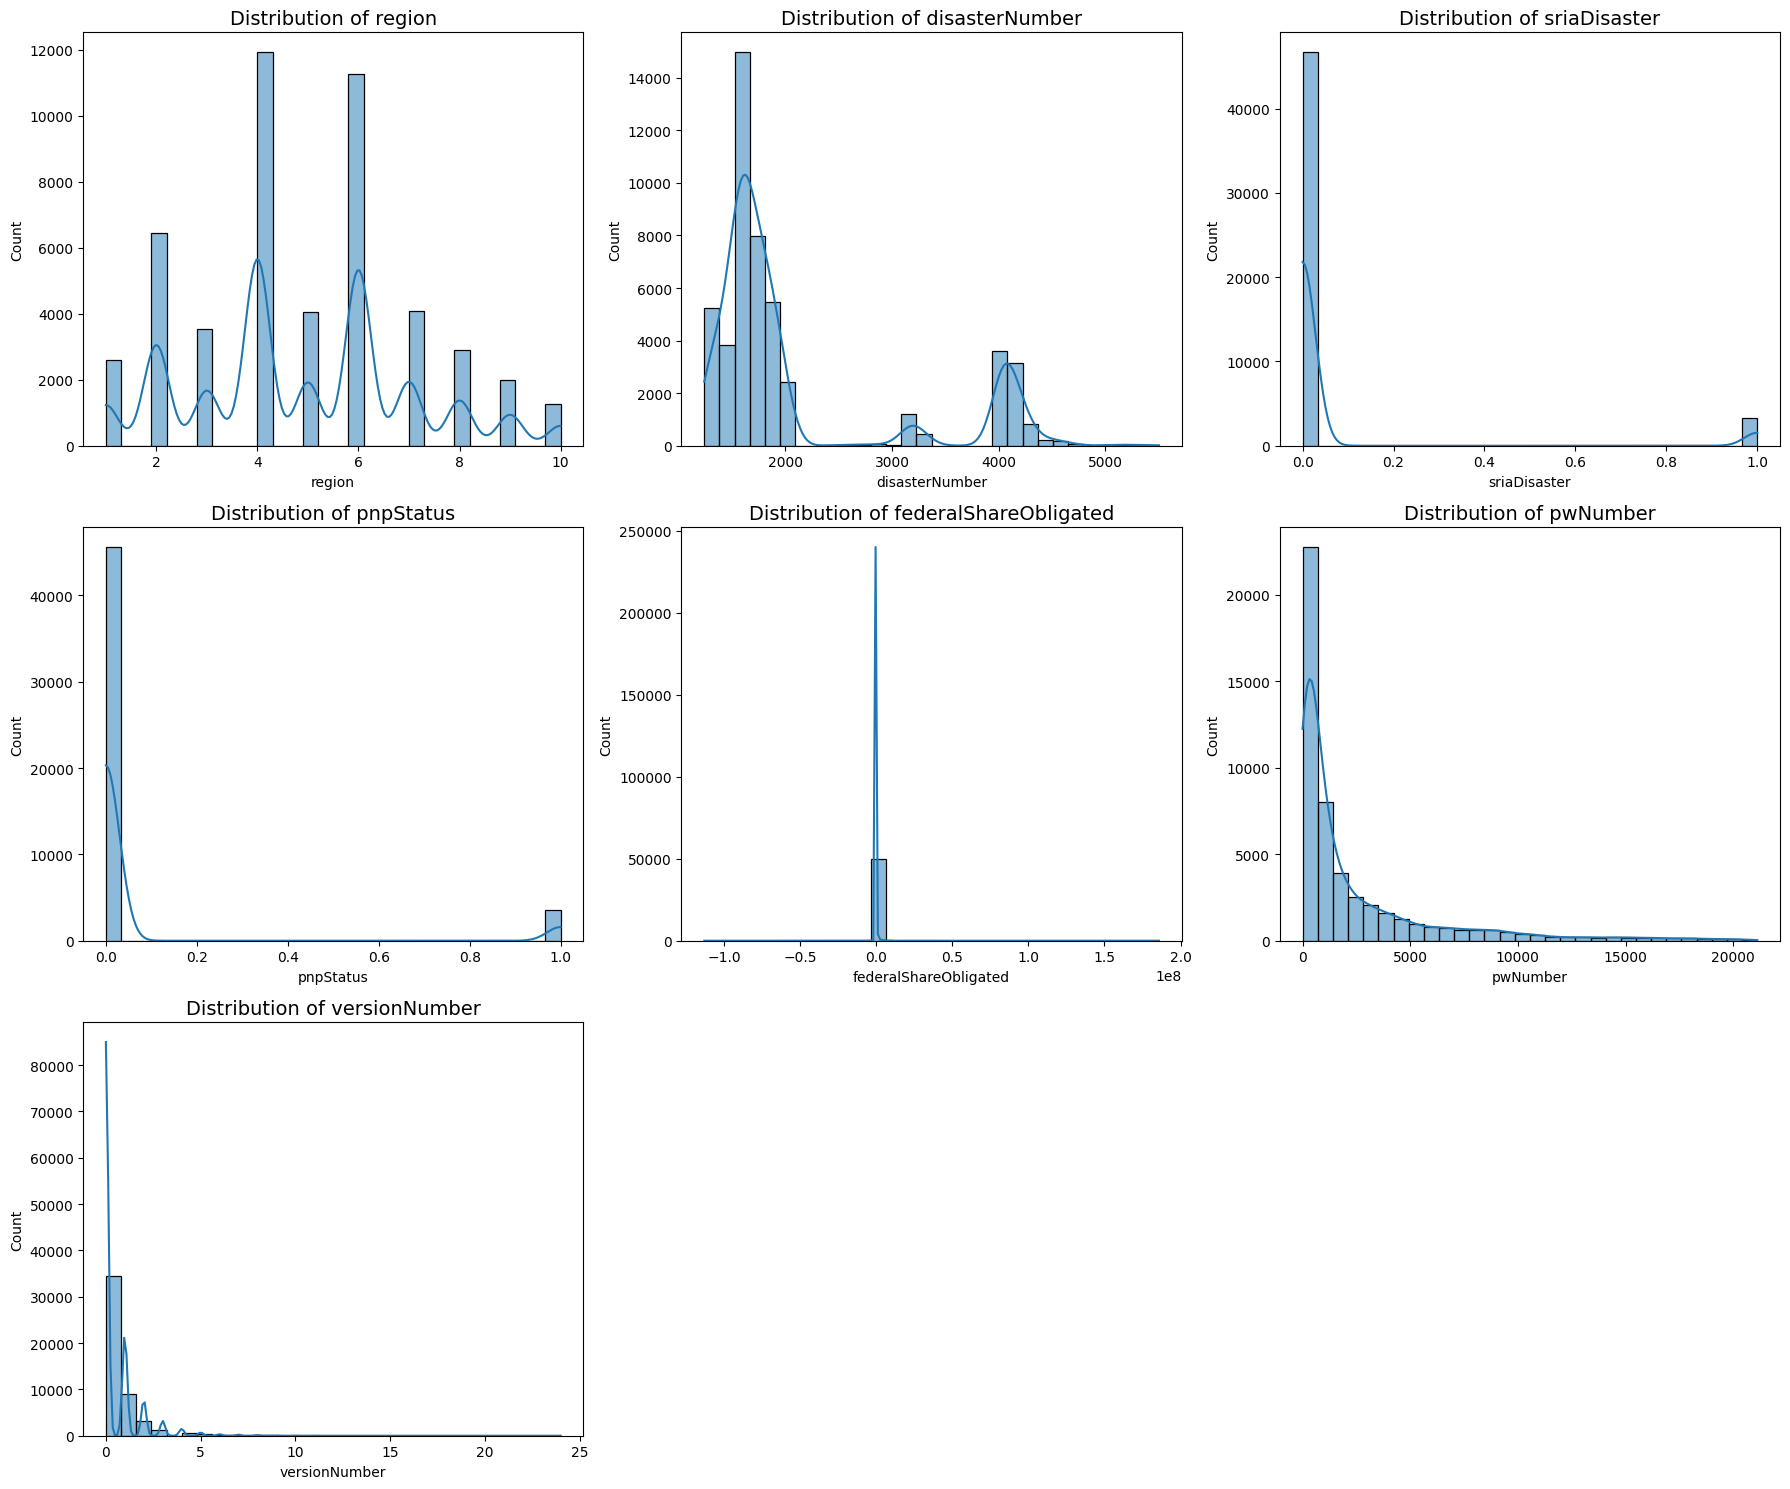

In [77]:
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # makes indexing easy

for idx, col in enumerate(num_cols):
    sns.histplot(
        data=df_clean,
        x=col,
        kde=True,
        ax=axes[idx],
        bins=30
    )
    
    axes[idx].set_title(f"Distribution of {col}", fontsize=14)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Remove empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

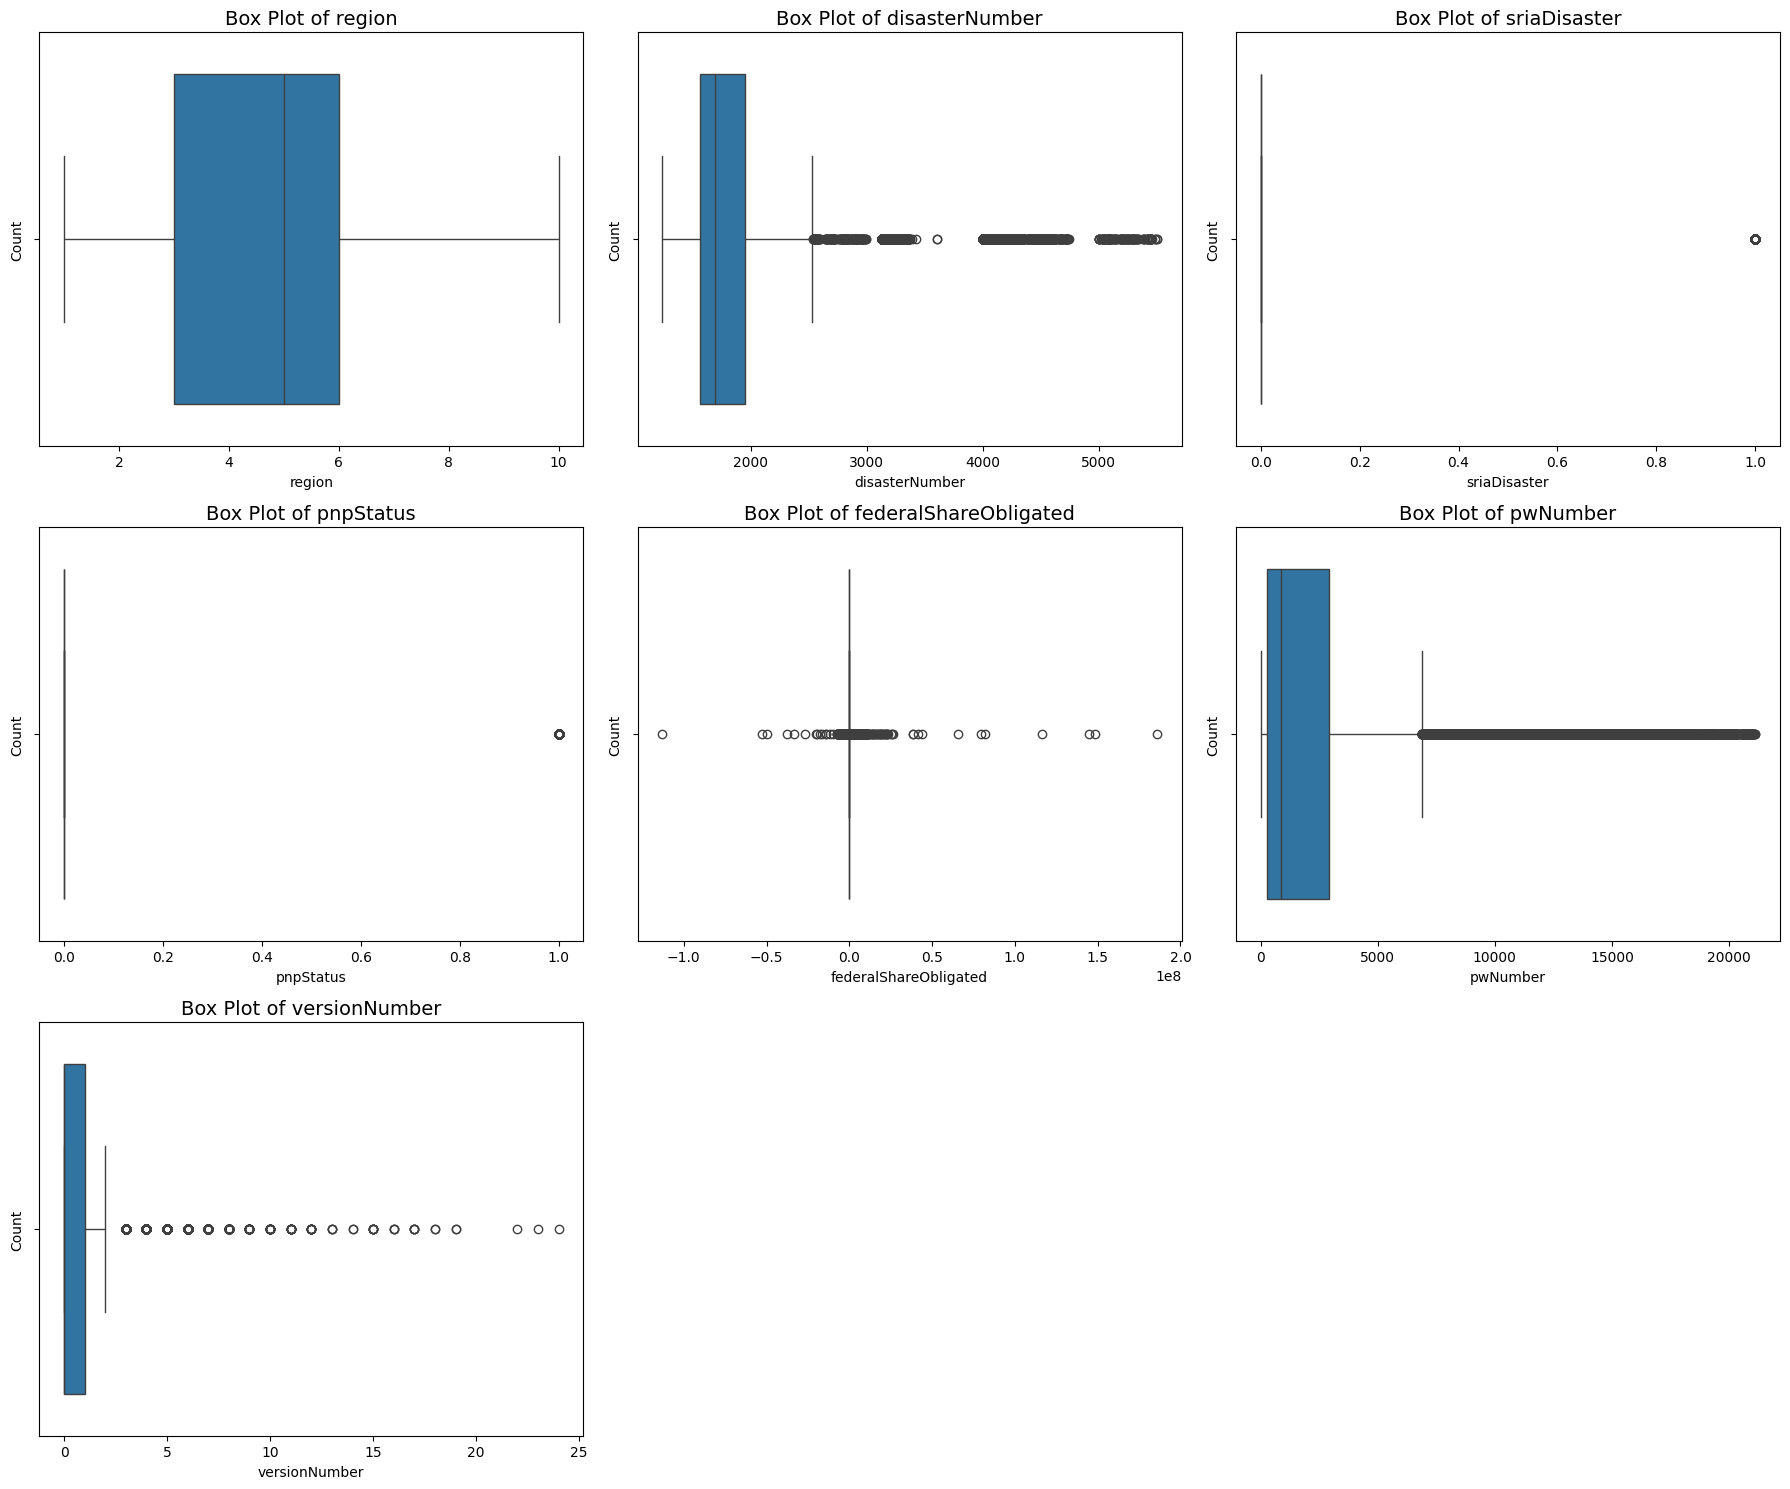

In [78]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # makes indexing easy

for idx, col in enumerate(num_cols):
    sns.boxplot(
        data=df_clean,
        x=col,
        ax=axes[idx]
    )
    
    axes[idx].set_title(f"Box Plot of {col}", fontsize=14)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Remove empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


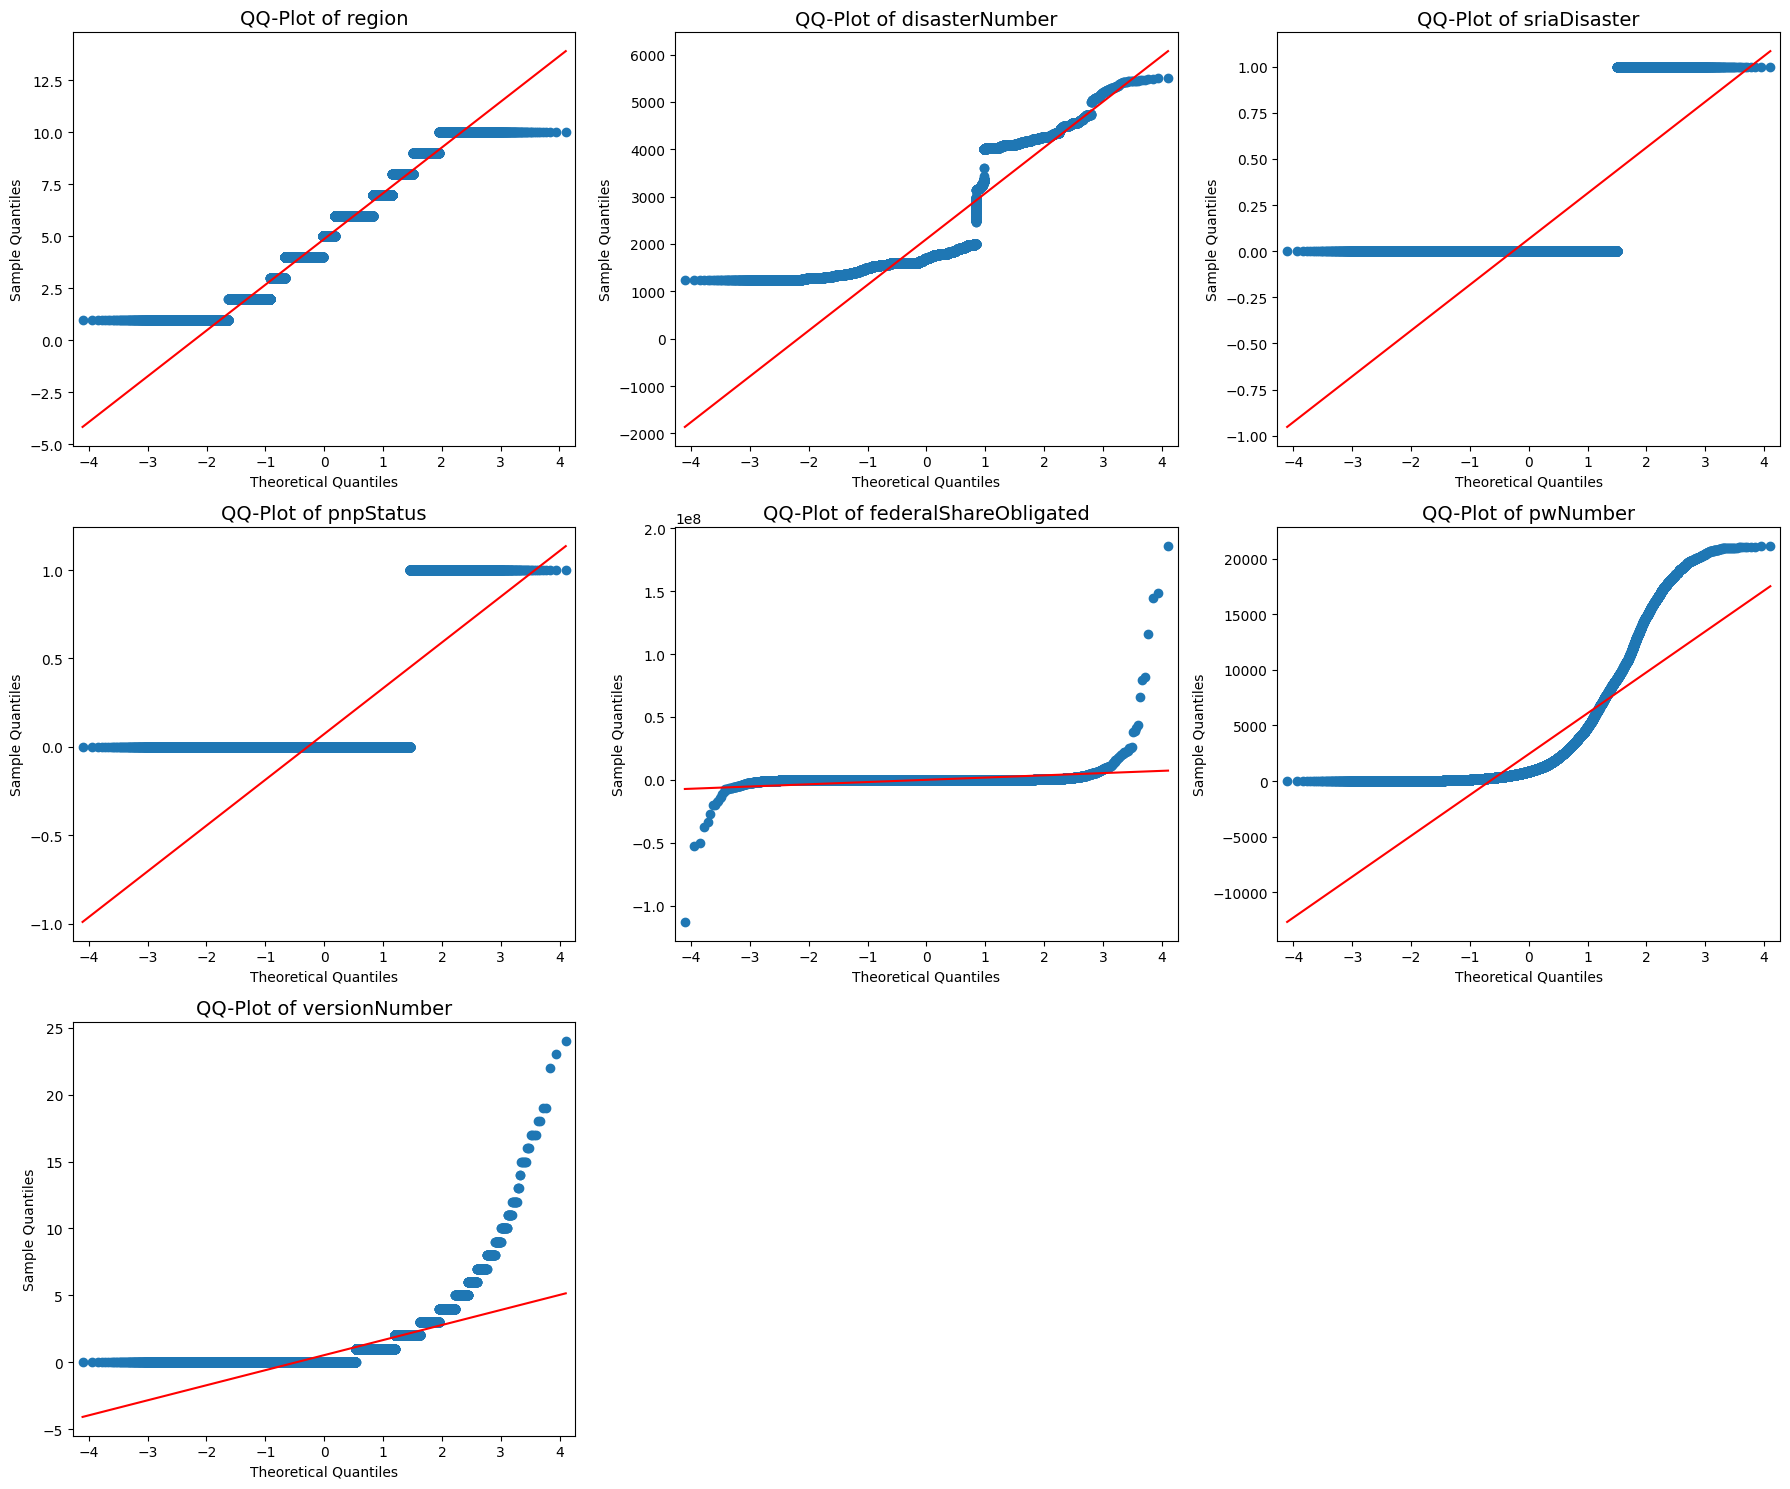

In [79]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sm.qqplot(
        df_clean[col].dropna(),
        line='s',
        ax=axes[idx]
    )

    axes[idx].set_title(f"QQ-Plot of {col}", fontsize=14)
    axes[idx].set_xlabel("Theoretical Quantiles")
    axes[idx].set_ylabel("Sample Quantiles")

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [80]:
# Calculating skewness and kurtosis of each numerical feature
stats_df = (
    df_clean[num_cols]
    .agg(['skew', 'kurt'])
    .T
    .reset_index()
    .rename(columns={'index': 'feature'})
)

In [81]:
stats_df

,feature,skew,kurt
0,region,0.224031,-0.516244
1,disasterNumber,1.500200,0.610458
2,sriaDisaster,3.500709,10.255372
3,pnpStatus,3.302960,8.909907
4,federalShareObligated,50.917833,5211.481939
5,pwNumber,2.418726,6.094455
6,versionNumber,4.510589,39.243695


**B. Categorical columns**

**declarationTitle**: Describes the official title of the disaster declaration as issued by FEMA, typically summarizing the nature, location, or scope of the event. This field provides contextual information about the disaster and is useful for grouping similar events, validating disaster metadata, and improving interpretability when presenting or reporting results.

**disasterType**: Indicates the type of FEMA disaster declaration (for example, major disaster, emergency, or fire management assistance). This classification determines the level of federal involvement, available assistance programs, and overall funding mechanisms, making it important for policy-level analysis and comparison across disaster responses.

**incidentType**: Specifies the underlying hazard or cause of the disaster, such as flood, hurricane, wildfire, earthquake, or severe storm. This column is critical for hazard-based analysis, allowing comparison of impacts, costs, and recovery patterns across different types of incidents.

**stateAbbreviation**: Contains the standard two-letter abbreviation of the U.S. state in which the disaster or project is located. This provides a compact geographic identifier that is useful for joins, filtering, and aggregation in analytical workflows.

**state**: Stores the full name of the state associated with the disaster or project. It offers a more readable geographic reference and is commonly used for reporting, visualization, and state-level impact analysis.

**county**: Identifies the county in which the applicant or project is located. This enables fine-grained geographic analysis, such as county-level damage assessment, funding distribution, and localized disaster impact studies.

**applicantId**: A unique identifier assigned to each applicant within FEMA’s Public Assistance program. This field allows consistent tracking of an entity across multiple disasters or projects and is essential for applicant-level aggregation, history analysis, and deduplication.

**applicantName**: The official name of the applying entity, such as a local government, state agency, or private non-profit organization. This column adds human-readable context and is useful for validation, reporting, and identifying major recipients of federal assistance.

**damageCategoryCode**: Represents the FEMA damage category under which the project falls (such as debris removal, emergency protective measures, or permanent work categories). This classification is central to understanding the nature of the work performed and supports analysis of cost distribution across different types of disaster-related activities.

**projectTitle**: Provides a short descriptive title summarizing the scope or purpose of the project worksheet. It often reflects the type of damage or recovery activity and can be used for qualitative analysis, text-based exploration, or project categorization.

**eligibilityStatus**: Indicates whether the project or applicant has been deemed eligible for federal assistance based on FEMA guidelines. This field is important for understanding approval rates, rejection patterns, and compliance with program requirements.

**fundingStatus**: Reflects the current stage of funding for the project, such as pending, approved, obligated, or denied. It helps track progress through the funding lifecycle and is useful for monitoring delays, bottlenecks, or completion rates.

**paCloseoutStatus**: Denotes whether the Public Assistance (PA) project has been formally closed out, meaning all work has been completed, costs reconciled, and documentation finalized. This status is critical for lifecycle analysis and identifying ongoing versus completed recovery efforts.

**id**: A system-generated unique identifier for each record in the dataset. This column serves as a technical primary key, ensuring record-level uniqueness and enabling reliable joins, indexing, and traceability within and across datasets.

In [101]:
cat_cols

['declarationTitle',
 'disasterType',
 'incidentType',
 'stateAbbreviation',
 'state',
 'county',
 'applicantId',
 'applicantName',
 'damageCategoryCode',
 'projectTitle',
 'eligibilityStatus',
 'fundingStatus',
 'paCloseoutStatus',
 'id']

In [102]:
df_clean[cat_cols].head(5)

,declarationTitle,disasterType,incidentType,stateAbbreviation,state,county,applicantId,applicantName,damageCategoryCode,projectTitle,eligibilityStatus,fundingStatus,paCloseoutStatus,id
796593,HURRICANE IKE,DR,Hurricane,TX,Texas,Harris,201-35000-00,HOUSTON,E - Public Buildings,PWE79 Imperial Valley WWTP,E,O,O,e077dfc0-4dd1-42db-bfbc-437714fc0d8d
494135,"SEVERE STORMS, FLOODING, AND TORNADOES",DR,Severe Storm,IA,Iowa,Montgomery,137-UDTEO-00,MONTGOMERY COUNTY ROAD DEPARTMENT,A - Debris Removal,DEBRIS REMOVAL,E,O,C,ca6533d0-35ab-46a0-979b-bcbfeb7e3d0d
803743,"SEVERE STORMS, FLOODING, AND MUDSLIDES",DR,Flood,NM,New Mexico,Statewide,000-35180-00,JEMEZ PUEBLO (INDIAN RESERVATION),A - Debris Removal,POJ005A Owl Bridge Sediment Removal,E,O,O,2e1cf3e8-a901-4c66-9b0a-5c3e4e4523ae
190217,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",DR,Severe Storm,OR,Oregon,Polk,053-99053-00,POLK (COUNTY),C - Roads and Bridges,REPAIR ROADWAY EMBANKMENT - FALLS CITY RD,E,O,C,8a2134ea-0bad-4e35-adc7-b8ba4a077340
32476,SEVERE WIND STORM ASSOCIATED WITH TROPICAL DEP...,DR,Severe Storm,OH,Ohio,Licking,089-33894-00,HARRISON (TOWNSHIP OF),B - Protective Measures,BSJ-07 Township Roads,E,O,C,2f3c23d6-7ecf-41a8-a01f-f0a887010e95


In [83]:
for col in cat_cols:
    print(f'Unique Lables are: {df_clean[col].nunique()}')
    print(f'Value Counts are: {df_clean[col].value_counts()}')
    print('='*50)

Unique Lables are: 603
Value Counts are: declarationTitle
SEVERE STORMS AND FLOODING                6205
HURRICANE KATRINA                         5229
SEVERE STORMS, TORNADOES, AND FLOODING    3105
HURRICANE WILMA                           1733
HURRICANE IKE                             1726
                                          ... 
TRACK FIRE                                   1
ELK FIRE                                     1
Michigan - Flood                             1
HAWKEN FIRE                                  1
LODGEPOLE FIRE COMPLEX                       1
Name: count, Length: 603, dtype: int64
Unique Lables are: 3
Value Counts are: disasterType
DR    48034
EM     1661
FM      305
Name: count, dtype: int64
Unique Lables are: 24
Value Counts are: incidentType
Severe Storm         20295
Hurricane            19971
Flood                 3694
Snowstorm             1888
Severe Ice Storm      1534
Fire                   883
Typhoon                413
Tornado                315
Ear

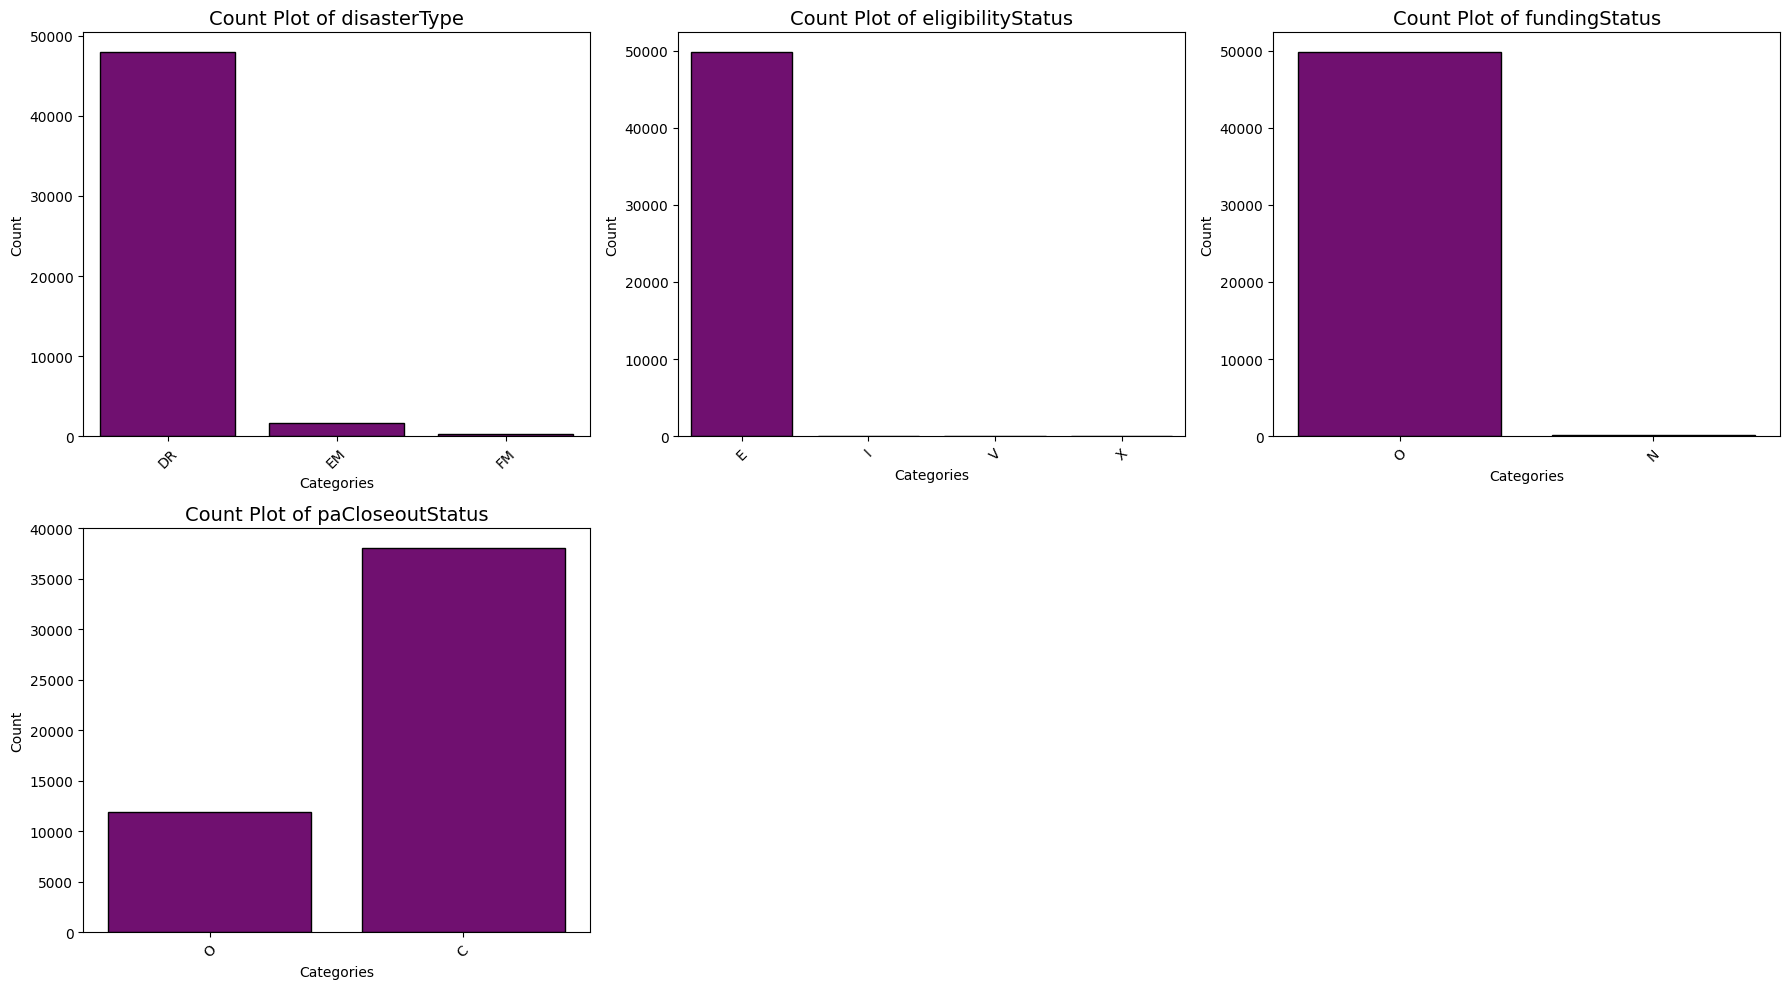

In [84]:
low_cardinal_cols = [
    col for col in cat_cols if df_clean[col].nunique() <= 10
]

n_cols = 3
n_rows = math.ceil(len(low_cardinal_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(low_cardinal_cols):
    sns.countplot(
        data=df_clean,
        x=col,
        ax=axes[idx],
        edgecolor='black',
        color='purple'
    )

    axes[idx].set_title(f"Count Plot of {col}", fontsize=14)
    axes[idx].set_xlabel("Categories")
    axes[idx].set_ylabel("Count")
    axes[idx].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(len(low_cardinal_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [85]:
high_cardinal_col = ['damageCategoryCode', 'incidentType', 'state', 'incidentType', 'county']

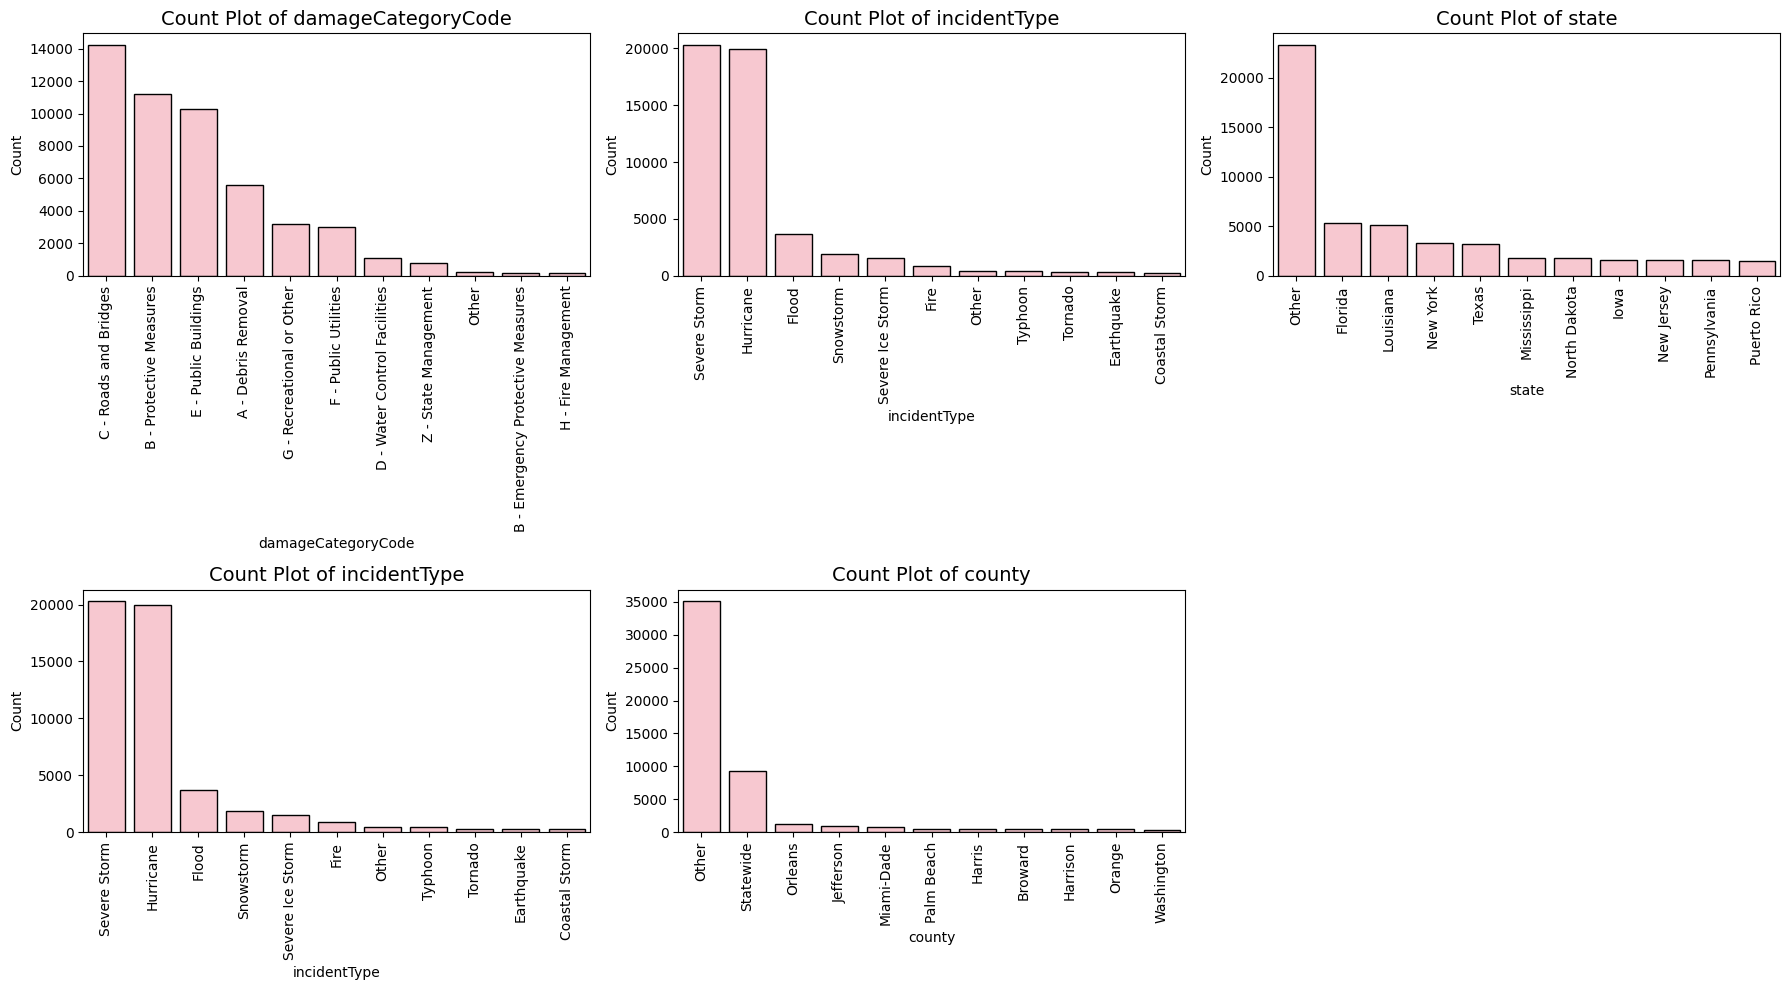

In [96]:
n_cols = 3
n_rows = math.ceil(len(high_cardinal_col) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(high_cardinal_col):

    value_counts = df_clean[col].value_counts(dropna=True)

    top_10 = value_counts.nlargest(10).index

    plot_data = df_clean[col].where(
        df_clean[col].isin(top_10),
        other="Other"
        )
    
    sns.countplot(
        x=plot_data,
        ax=axes[idx],
        order=plot_data.value_counts().index,
        color="pink",
        edgecolor="black"
    )

    axes[idx].set_title(f"Count Plot of {col}", fontsize=14)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")
    axes[idx].tick_params(axis='x', rotation=90)

# Remove unused axes
for j in range(len(high_cardinal_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [91]:
df.county.value_counts().nlargest(10)

county
Statewide     9298
Orleans       1200
Jefferson      880
Miami-Dade     805
Palm Beach     522
Harris         483
Broward        453
Harrison       438
Orange         438
Washington     386
Name: count, dtype: int64

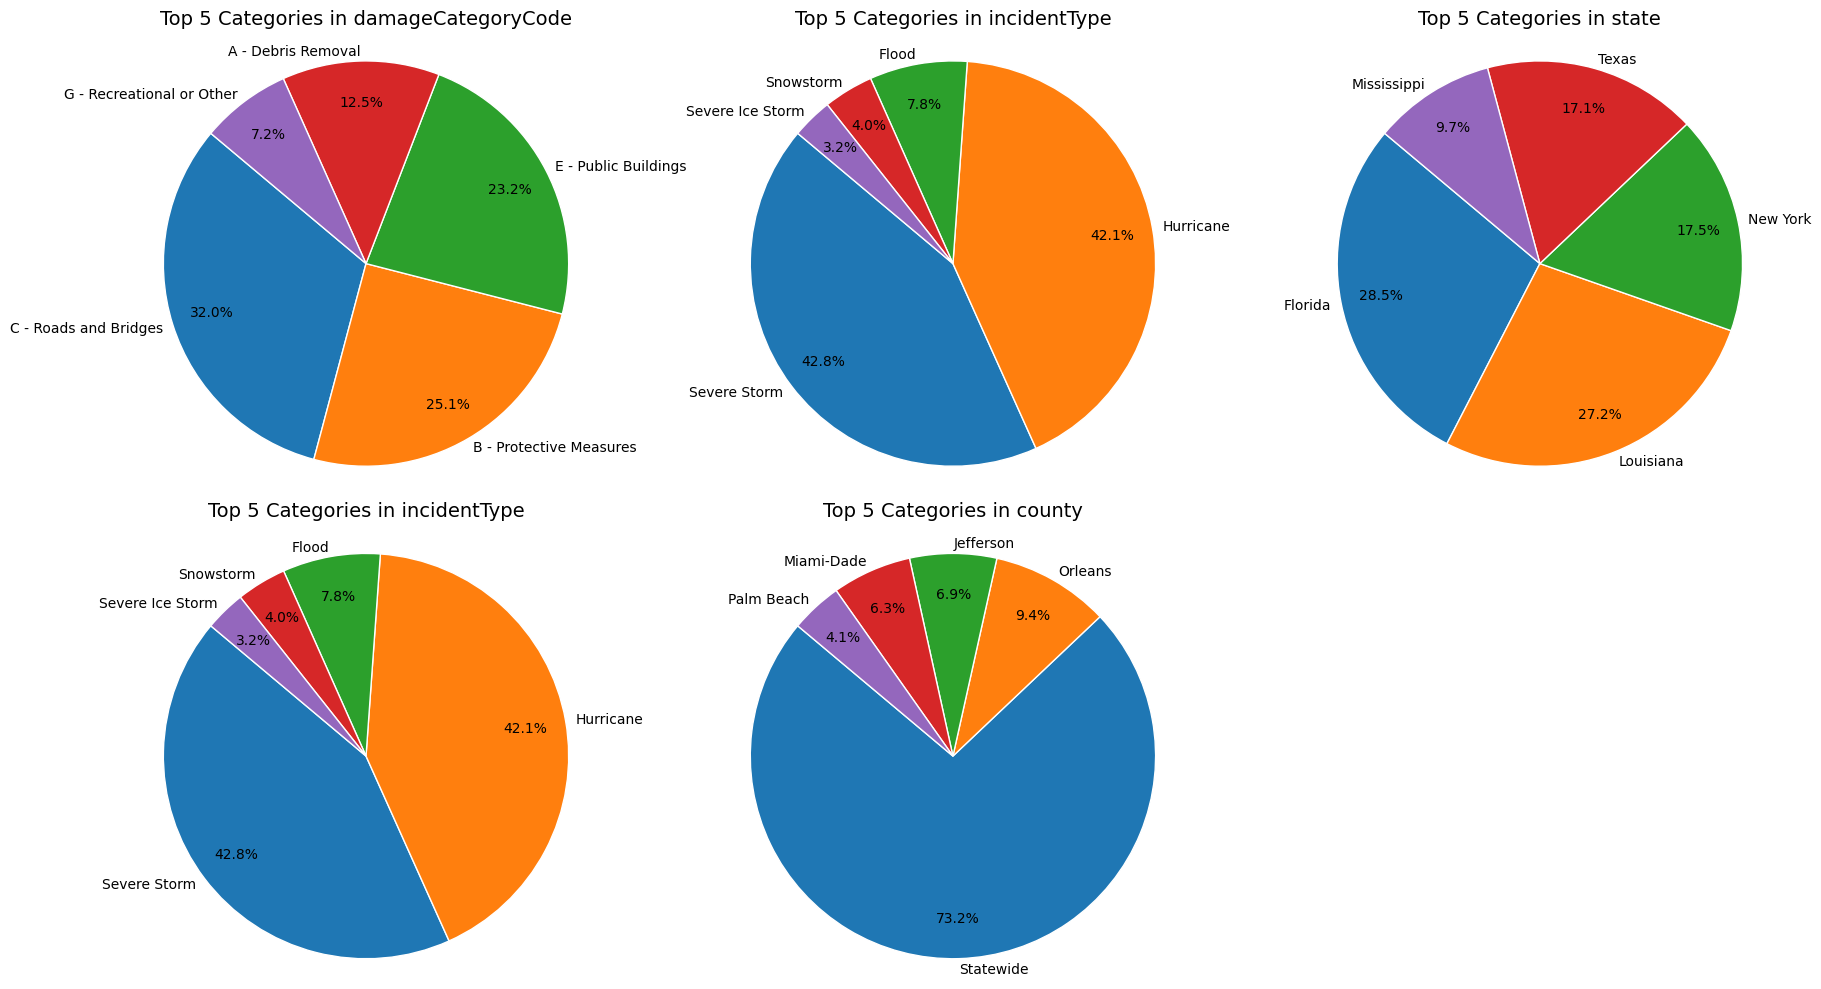

In [94]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(high_cardinal_col):
    val_cnt = df[col].value_counts()

    top_k = 5
    labels = val_cnt.nlargest(top_k).index
    values = val_cnt.nlargest(top_k).values

    axes[idx].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.8,
        labeldistance=1.05,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )

    axes[idx].set_title(f"Top {top_k} Categories in {col}", fontsize=14, pad=12)
    axes[idx].axis('equal')

# Remove unused axes
for j in range(len(high_cardinal_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


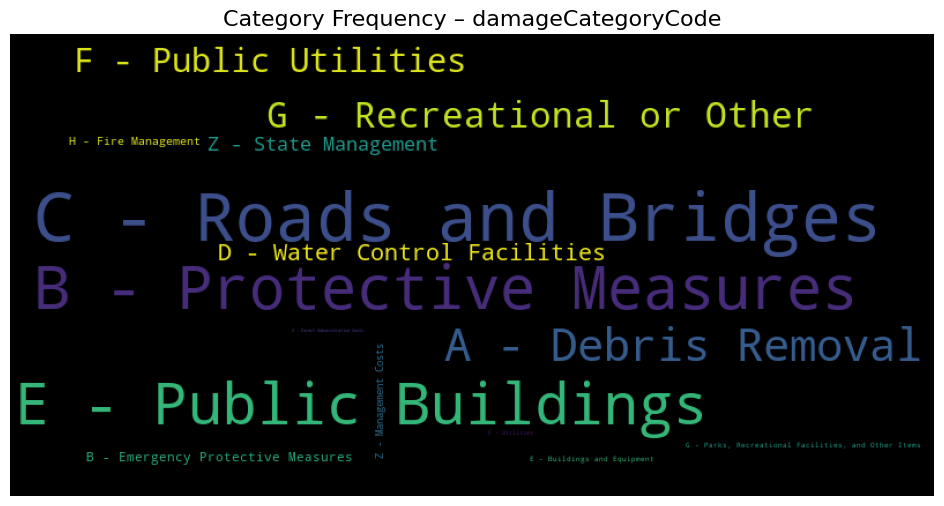

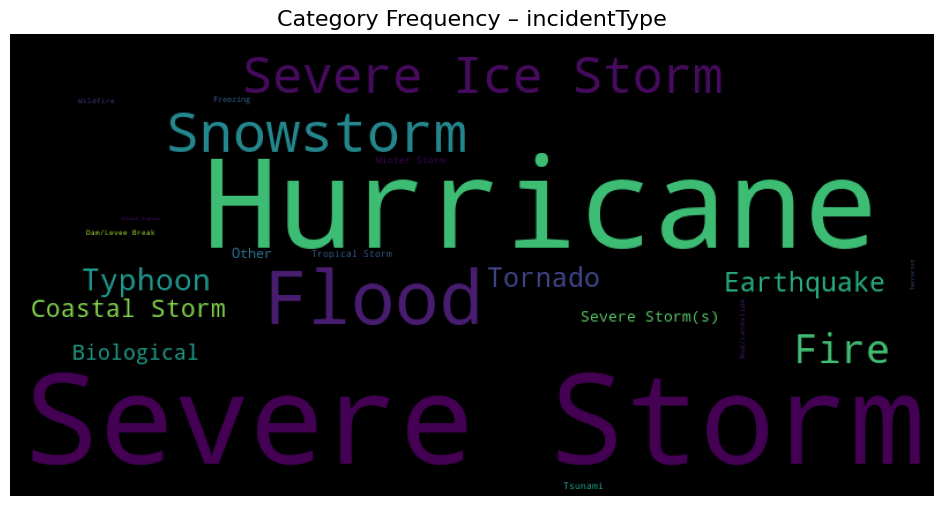

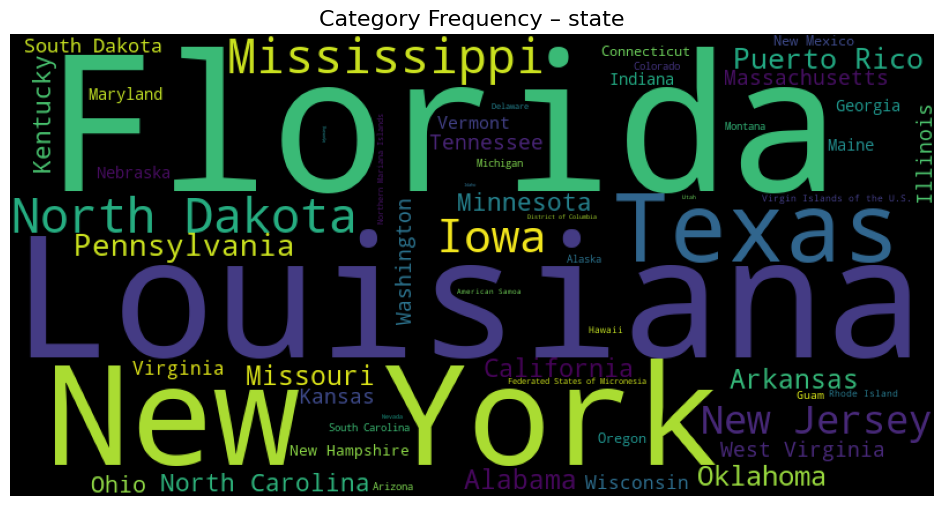

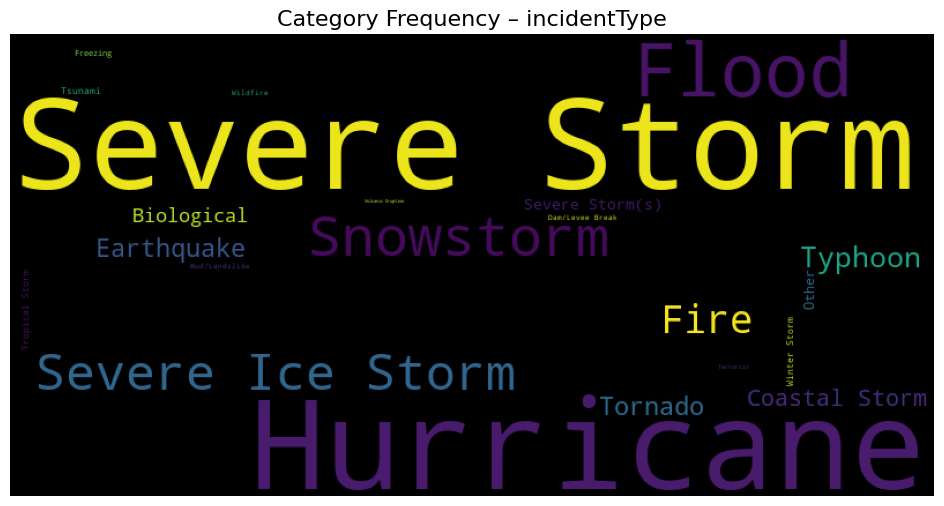

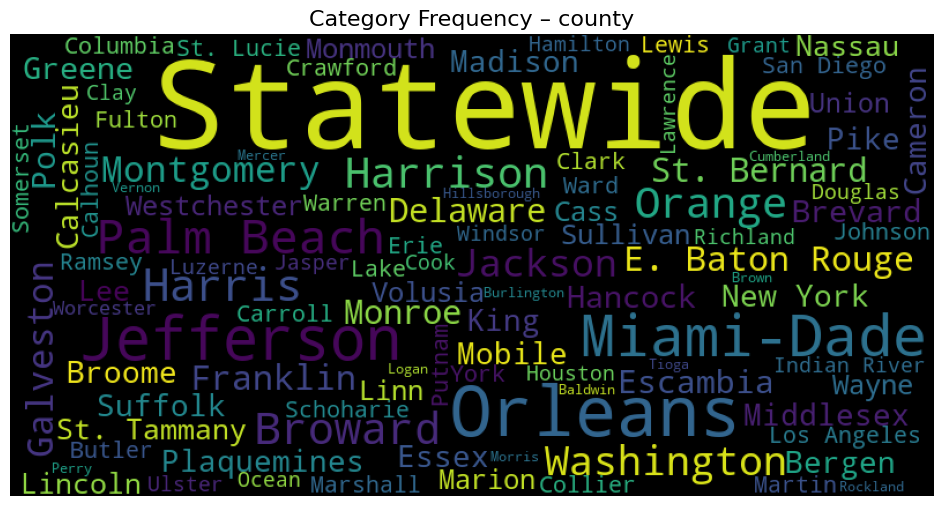

In [108]:
for col in high_cardinal_col:
    freqs = (
        df[col]
        .dropna()
        .astype(str)
        .value_counts()
        .to_dict()
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        max_words=100
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"Category Frequency – {col}", fontsize=16)
    plt.show()